# Term-Project Midterm Report

## 지하철 역별 승하차 인원수와 역별 출구 화장실 현황의 관계

### (1) 주제 선정 이유 
본 텀프로젝트에서는 지하철 역별 승하차 인원수 데이터와 역별 출구 주변 시설 목록 데이터를 비교하여 승하차 인원수가 많은 역에 적절히 화장실 변기 개수가 배치되어있는지를 비교하고자 한다. 예를 들어 특정 역에서 승하차 인원수가 많은데 비해 화장실 변기의 수가 부족하다면, 승객들이 불편을 느낄 수 있을 것이다. 따라서 이에 중점을 두어 두 개의 데이터를 가공하여 비교할 것이다.

### (2) 가설 정의
어떤 역의 화장실이 유동인구에 비해 변기 수가 많고, 어떤 역의 화장실이 유동인구에 비해 변기 수가 적어 불편한지 상대적으로 밝혀내고자 한다.

### (3) 인터넷을 통한 데이터 획득

승하차 인원수 데이터는 다음 사진과 같이 2015년도 1월부터 2019년도 3월까지 총 51개의 csv 파일이 존재한다.

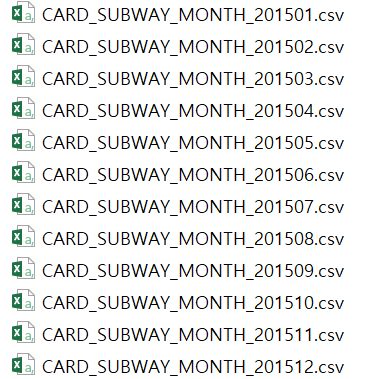

또한 각각의 csv 파일에는 다음 사진과 같이 가공되지 않은 데이터들이 존재한다.

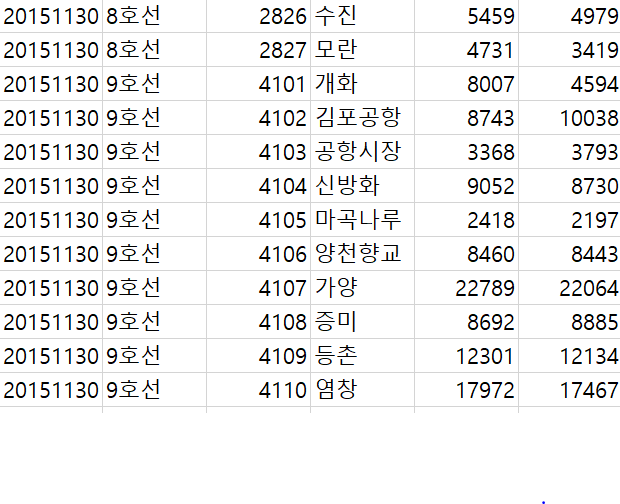

이 가공되지 않은 데이터를 우선 엑셀 데이터 정렬 기능을 통해 오름차순으로 정리해본 결과 다음과 같다.

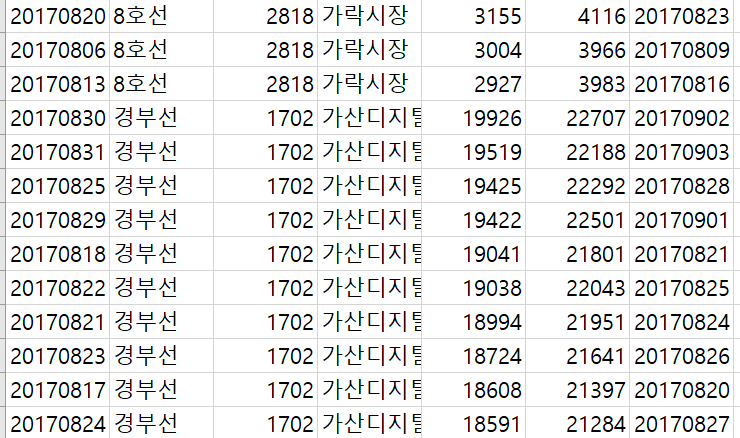

사진에서 보이는 바와 같이 한 역당 여러 개의 데이터가 존재하는데, 이를 파이썬으로 가공하여 각 역당 승차 인원과 하차인원의 평균 인원수를 계산할 것이다. 이때 사용할 데이터는 2018년 6월, 2018년 9월, 2018년 12월, 2018년 3월로 근 1년간의 데이터이며, 4개의 파일에 있는 역 당 승하차 인원수의 평균수를 구할 것이다.

또한 환승역이 있는 지하철역에 대해서 데이터 분석을 진행할 예정이다. 환승역이 있는 지하철은 "가락시장, 가산디지털단지, 강동, 강남, 강남구청, 건대입구, 고속터미널,	공덕,	교대, 군자,	김포공항, 까치산, 노원, 당산, 대림, 도곡, 도봉산,	동대문, 동대문역사문화공원,	동묘앞, 동작, 디지털미디어시티, 모란, 보문, 복정, 부평구청, 불광, 사당, 삼각지, 상봉, 서울, 석계, 석촌, 선릉, 성수, 성신여대입구, 수서, 시청, 신길, 신당, 신도림,	신설동, 약수, 양재, 여의도, 연신내, 영등포구청, 오금, 옥수, 온수, 올림픽공원, 왕십리, 을지로3가, 을지로4가, 이수,	이촌,	잠실, 종로3가, 종합운동장, 창동, 천호, 청구, 청량리,	총신대입구, 충무로,	충정로, 태릉입구, 합정, 홍대입구, 효창공원앞" 으로 총 70개의 역이다. 이 70개의 역을 두고 시설이 잘 구축이 되어있는지를 비교해보겠다.

두 번째 데이터 파일은 역사 내 화장실의 변기의 개수를 나타낸다.

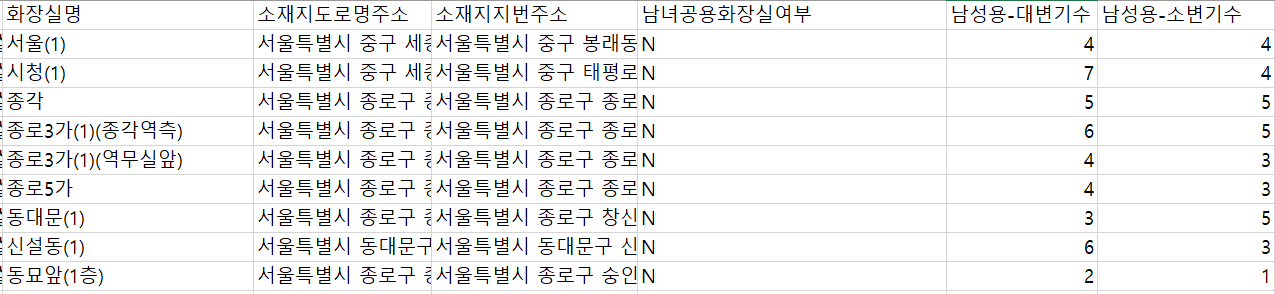

이 70개의 역에 대해 승하차 인원의 평균과 변기의 개수의 비를 구하여 비가 낮은 역부터 비가 높은 역까지 그래프로 표현할 것이다.

# 원본 데이터 출처

열차 승하차 인원수 데이터 : http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-12914&srvType=S&serviceKind=1&currentPageNo=1&searchValue=&searchKey=null

역사 화장실 변기수 데이터 : http://www.seoulmetro.co.kr/kr/board.do?menuIdx=551&bbsIdx=2210

### (4) 분석을 위한 데이터 가공

파일을 입력파라미터로 받아 파일을 열어 파일의 데이터를 리스트인 리스트로 바꿔 반환하는 함수

In [1]:
def file_to_list(file): 
    fileMatrix=[]
    with open(file,'rt', encoding='UTF8') as file:
        for linecontent in file:
            fileMatrix.append(linecontent.strip('\n').split(','))
        
        
        
    return fileMatrix



In [2]:
station_list=["가락시장","가산디지털단지","강동","강남","강남구청","건대입구","고속터미널", "공덕","교대","군자","김포공항","까치산","노원","당산","대림","도곡","도봉산","동대문","동대문역사문화공원","동묘앞","동작","디지털미디어시티","모란","보문","복정","부평구청","불광","사당","삼각지","상봉","서울","석계","석촌","선릉","성수","성신여대입구","수서","시청","신길","신당","신도림","신설동","약수","양재","여의도","연신내","영등포구청","오금","옥수","온수","올림픽공원","왕십리","을지로3가","을지로4가","이수","이촌","잠실","종로3가","종합운동장","창동","천호","청구","청량리","총신대입구","충무로","충정로","태릉입구","합정","홍대입구","효창공원앞"]

리스트를 새로 정의하여 리스트의 각 리스트인리스트마다 인덱스, 역 이름, 승하차인원의 합, 역개수 승하차인원의 평균을 아이템으로 받는다.(변수이름 : average_list)

In [3]:
average_list=[["인덱스","역","승하차인원의합","역개수","승하차인원의평균"]]
for i in range(len(station_list)):
    average_list.append([])
for i in range(1,len(station_list)+1):
    average_list[i].append(i)
    average_list[i].append(station_list[i-1])
for i in range(1,len(station_list)+1):
    average_list[i].append(0)
    average_list[i].append(0)
    average_list[i].append(0)
print(average_list)

[['인덱스', '역', '승하차인원의합', '역개수', '승하차인원의평균'], [1, '가락시장', 0, 0, 0], [2, '가산디지털단지', 0, 0, 0], [3, '강동', 0, 0, 0], [4, '강남', 0, 0, 0], [5, '강남구청', 0, 0, 0], [6, '건대입구', 0, 0, 0], [7, '고속터미널', 0, 0, 0], [8, '공덕', 0, 0, 0], [9, '교대', 0, 0, 0], [10, '군자', 0, 0, 0], [11, '김포공항', 0, 0, 0], [12, '까치산', 0, 0, 0], [13, '노원', 0, 0, 0], [14, '당산', 0, 0, 0], [15, '대림', 0, 0, 0], [16, '도곡', 0, 0, 0], [17, '도봉산', 0, 0, 0], [18, '동대문', 0, 0, 0], [19, '동대문역사문화공원', 0, 0, 0], [20, '동묘앞', 0, 0, 0], [21, '동작', 0, 0, 0], [22, '디지털미디어시티', 0, 0, 0], [23, '모란', 0, 0, 0], [24, '보문', 0, 0, 0], [25, '복정', 0, 0, 0], [26, '부평구청', 0, 0, 0], [27, '불광', 0, 0, 0], [28, '사당', 0, 0, 0], [29, '삼각지', 0, 0, 0], [30, '상봉', 0, 0, 0], [31, '서울', 0, 0, 0], [32, '석계', 0, 0, 0], [33, '석촌', 0, 0, 0], [34, '선릉', 0, 0, 0], [35, '성수', 0, 0, 0], [36, '성신여대입구', 0, 0, 0], [37, '수서', 0, 0, 0], [38, '시청', 0, 0, 0], [39, '신길', 0, 0, 0], [40, '신당', 0, 0, 0], [41, '신도림', 0, 0, 0], [42, '신설동', 0, 0, 0], [43, '약수', 0, 0, 0], [44, '양재', 0, 0, 0]

네 개의 승하차인원 데이터 위에서 정의한 file_to_list 함수를 이용하여 파일의 데이터행렬을 리스트로 바꾼다.(변수이름 : total_file_lsit)

In [4]:
file_201806_list=file_to_list('CARD_SUBWAY_MONTH_201806.csv')
file_201809_list=file_to_list('CARD_SUBWAY_MONTH_201809.csv')
file_201812_list=file_to_list('CARD_SUBWAY_MONTH_201812.csv')
file_201903_list=file_to_list('CARD_SUBWAY_MONTH_201903.csv')
total_file_list=file_201806_list+file_201809_list+file_201812_list+file_201903_list

for i in range(len(total_file_list)):
    for j in range(len(total_file_list[0])):
        total_file_list[i][j]=total_file_list[i][j].strip('\"')


average_list라는 리스트의 승하차인원의합 열에 위 total_file_list로부터 모든 승차인원과 하차인원의 합을 구해 집어넣고, 역개수열에 데이터에 있는 역의 개수만큼 집어 넣는다. 이때 데이터에 있는 역의 개수를 구하는 이유는 이후 승하차인원(승차인원+하차인원)의 평균(승하차인원의합/(역개수*2))를 구하기 위함이다.

In [5]:
for i in range(1,len(total_file_list)):
        for j in range(1,len(average_list)):
            if total_file_list[i][3].count('(')>=1:
                if total_file_list[i][3][0:total_file_list[i][3].find('(')]==average_list[j][1]:
                    average_list[j][2]=int(average_list[j][2]+float(total_file_list[i][4])+float(total_file_list[i][5]))
                    average_list[j][3]=average_list[j][3]+1
            else:
                if total_file_list[i][3]==average_list[j][1]:
                    average_list[j][2]=int(average_list[j][2]+float(total_file_list[i][4])+float(total_file_list[i][5]))
                    average_list[j][3]=average_list[j][3]+1
                

average_list

[['인덱스', '역', '승하차인원의합', '역개수', '승하차인원의평균'],
 [1, '가락시장', 4005539, 222, 0],
 [2, '가산디지털단지', 11823317, 222, 0],
 [3, '강동', 4052495, 111, 0],
 [4, '강남', 21685005, 111, 0],
 [5, '강남구청', 5307848, 222, 0],
 [6, '건대입구', 14099212, 222, 0],
 [7, '고속터미널', 21881620, 333, 0],
 [8, '공덕', 8158119, 445, 0],
 [9, '교대', 10815809, 222, 0],
 [10, '군자', 5362098, 222, 0],
 [11, '김포공항', 5959481, 366, 0],
 [12, '까치산', 6429512, 111, 0],
 [13, '노원', 9952341, 222, 0],
 [14, '당산', 8809684, 222, 0],
 [15, '대림', 9003159, 222, 0],
 [16, '도곡', 2711290, 222, 0],
 [17, '도봉산', 3916972, 222, 0],
 [18, '동대문', 9079483, 222, 0],
 [19, '동대문역사문화공원', 9853141, 333, 0],
 [20, '동묘앞', 4674280, 222, 0],
 [21, '동작', 1038789, 222, 0],
 [22, '디지털미디어시티', 5833465, 336, 0],
 [23, '모란', 6075479, 222, 0],
 [24, '보문', 1959898, 222, 0],
 [25, '복정', 2356234, 155, 0],
 [26, '부평구청', 2308613, 111, 0],
 [27, '불광', 5612284, 222, 0],
 [28, '사당', 16061118, 222, 0],
 [29, '삼각지', 2607004, 222, 0],
 [30, '상봉', 5080783, 222, 0],
 [31, '서울', 15016691, 

행마다 승하차인원/(역개수*2) 연산을 하여 승하차인원의평균 열에 값을 넣는다.

In [6]:
for i in range(1,len(average_list)):
    average_list[i][4]=int(average_list[i][2]/(average_list[i][3]*2))
average_list

[['인덱스', '역', '승하차인원의합', '역개수', '승하차인원의평균'],
 [1, '가락시장', 4005539, 222, 9021],
 [2, '가산디지털단지', 11823317, 222, 26629],
 [3, '강동', 4052495, 111, 18254],
 [4, '강남', 21685005, 111, 97680],
 [5, '강남구청', 5307848, 222, 11954],
 [6, '건대입구', 14099212, 222, 31754],
 [7, '고속터미널', 21881620, 333, 32855],
 [8, '공덕', 8158119, 445, 9166],
 [9, '교대', 10815809, 222, 24359],
 [10, '군자', 5362098, 222, 12076],
 [11, '김포공항', 5959481, 366, 8141],
 [12, '까치산', 6429512, 111, 28961],
 [13, '노원', 9952341, 222, 22415],
 [14, '당산', 8809684, 222, 19841],
 [15, '대림', 9003159, 222, 20277],
 [16, '도곡', 2711290, 222, 6106],
 [17, '도봉산', 3916972, 222, 8822],
 [18, '동대문', 9079483, 222, 20449],
 [19, '동대문역사문화공원', 9853141, 333, 14794],
 [20, '동묘앞', 4674280, 222, 10527],
 [21, '동작', 1038789, 222, 2339],
 [22, '디지털미디어시티', 5833465, 336, 8680],
 [23, '모란', 6075479, 222, 13683],
 [24, '보문', 1959898, 222, 4414],
 [25, '복정', 2356234, 155, 7600],
 [26, '부평구청', 2308613, 111, 10399],
 [27, '불광', 5612284, 222, 12640],
 [28, '사당', 160

이로써 total_file_list와 average_list 리스트가 완성되었다. total_file_list의 데이터를 추출하여 average_list에 각각 아이템으로 삽입하는 방식으로 하였다.

다음으로 화장실 변기 개수 데이터를 리스트로 바꾼다.(변수이름 : toilet_fileMatrix)

In [7]:
toilet_fileMatrix=[]
with open('information_of_toilet.csv', 'r') as file:
    for linecontent in file:
        toilet_fileMatrix.append(linecontent.strip('\n').split(','))
        
print(toilet_fileMatrix)

[['구분', '화장실명', '소재지도로명주소', '소재지지번주소', '남녀공용화장실여부', '남성용-대변기수', '남성용-소변기수', '남성용-장애인용대변기수', '남성용-장애인용소변기수', '남성용-어린이용대변기수', '남성용-어린이용소변기수', '여성용-대변기수', '여성용-장애인용대변기수', '여성용-어린이용대변기수', '관리기관명', '전화번호', '개방시간', '설치년도', '위도', '경도', '데이터기준일자'], ['공중화장실', '가락시장', '서울특별시송파구송파대로지하257', '서울특별시송파구송파대로지하257', 'N', '12', '7', '1', '0', '1', '0', '16', '1', '1', '서울교통공사', '02-6311-8171', '05:00~01:00', '16-Nov', '37.495002', '127.110205', '2018-02-28'], ['공중화장실', '가락시장(게이트내)', '서울특별시송파구송파대로지하257', '서울특별시송파구가락동298번지', 'N', '1', '1', '0', '0', '0', '1', '8', '0', '3', '서울교통공사', '02-6110-3501', '05:00~01:00', '10-Jan', '37.492898', '127.118058', '2018-02-28'], ['공중화장실', '가락시장(게이트외)', '서울특별시송파구송파대로지하257', '서울특별시송파구가락동298번지', 'N', '3', '3', '2', '0', '0', '1', '11', '2', '3', '서울교통공사', '02-6110-3501', '05:00~01:00', '10-Jan', '37.492898', '127.118058', '2018-02-28'], ['공중화장실', '가산디지털단지', '서울특별시금천구벚꽃로309', '서울특별시금천구벚꽃로309', 'N', '8', '5', '1', '0', '0', '0', '7', '1', '0', '서울교통공사', '02-6311-7461', '05:

위에서 리스트로 바꾼 toilet_fileMatrix에서 남성용대변기수, 남성용소변기수, 여성용대변기수 데이터열을 추출하여 새 리스트에 삽입한다.(변수이름 : toilet_list)

In [8]:
toilet_list=[['인덱스', '역', '남성용-대변기수', '남성용-소변기수', '여성용-대변기수']]
for i in range(1,len(station_list)+1):
    toilet_list.append([i, station_list[i-1]])
for i in range(1, len(station_list)+1):
    toilet_list[i].append(0)
    toilet_list[i].append(0)
    toilet_list[i].append(0)

    

toilet_list

[['인덱스', '역', '남성용-대변기수', '남성용-소변기수', '여성용-대변기수'],
 [1, '가락시장', 0, 0, 0],
 [2, '가산디지털단지', 0, 0, 0],
 [3, '강동', 0, 0, 0],
 [4, '강남', 0, 0, 0],
 [5, '강남구청', 0, 0, 0],
 [6, '건대입구', 0, 0, 0],
 [7, '고속터미널', 0, 0, 0],
 [8, '공덕', 0, 0, 0],
 [9, '교대', 0, 0, 0],
 [10, '군자', 0, 0, 0],
 [11, '김포공항', 0, 0, 0],
 [12, '까치산', 0, 0, 0],
 [13, '노원', 0, 0, 0],
 [14, '당산', 0, 0, 0],
 [15, '대림', 0, 0, 0],
 [16, '도곡', 0, 0, 0],
 [17, '도봉산', 0, 0, 0],
 [18, '동대문', 0, 0, 0],
 [19, '동대문역사문화공원', 0, 0, 0],
 [20, '동묘앞', 0, 0, 0],
 [21, '동작', 0, 0, 0],
 [22, '디지털미디어시티', 0, 0, 0],
 [23, '모란', 0, 0, 0],
 [24, '보문', 0, 0, 0],
 [25, '복정', 0, 0, 0],
 [26, '부평구청', 0, 0, 0],
 [27, '불광', 0, 0, 0],
 [28, '사당', 0, 0, 0],
 [29, '삼각지', 0, 0, 0],
 [30, '상봉', 0, 0, 0],
 [31, '서울', 0, 0, 0],
 [32, '석계', 0, 0, 0],
 [33, '석촌', 0, 0, 0],
 [34, '선릉', 0, 0, 0],
 [35, '성수', 0, 0, 0],
 [36, '성신여대입구', 0, 0, 0],
 [37, '수서', 0, 0, 0],
 [38, '시청', 0, 0, 0],
 [39, '신길', 0, 0, 0],
 [40, '신당', 0, 0, 0],
 [41, '신도림', 0, 0, 0],
 [42, '신설동', 0,

In [9]:
for i in range(1,len(toilet_fileMatrix)):
        for j in range(1,len(toilet_list)):
            if toilet_fileMatrix[i][1].count('(')>=1:
                if toilet_fileMatrix[i][1][0:toilet_fileMatrix[i][1].find('(')]==toilet_list[j][1]:
                    toilet_list[j][2]=int(toilet_list[j][2])+int(toilet_fileMatrix[i][5])
                    toilet_list[j][3]=int(toilet_list[j][3])+int(toilet_fileMatrix[i][6])
                    toilet_list[j][4]=int(toilet_list[j][4])+int(toilet_fileMatrix[i][11])
            else:
                if toilet_fileMatrix[i][1]==toilet_list[j][1]:
                    toilet_list[j][2]=int(toilet_list[j][2])+int(toilet_fileMatrix[i][5])
                    toilet_list[j][3]=int(toilet_list[j][3])+int(toilet_fileMatrix[i][6])
                    toilet_list[j][4]=int(toilet_list[j][4])+int(toilet_fileMatrix[i][11])
                    
toilet_list
                    
                

[['인덱스', '역', '남성용-대변기수', '남성용-소변기수', '여성용-대변기수'],
 [1, '가락시장', 16, 11, 35],
 [2, '가산디지털단지', 8, 5, 7],
 [3, '강동', 13, 8, 13],
 [4, '강남', 4, 3, 8],
 [5, '강남구청', 8, 5, 5],
 [6, '건대입구', 20, 17, 33],
 [7, '고속터미널', 7, 5, 6],
 [8, '공덕', 16, 10, 13],
 [9, '교대', 11, 8, 26],
 [10, '군자', 12, 6, 18],
 [11, '김포공항', 10, 6, 9],
 [12, '까치산', 15, 8, 16],
 [13, '노원', 15, 9, 24],
 [14, '당산', 4, 3, 10],
 [15, '대림', 16, 12, 24],
 [16, '도곡', 4, 4, 6],
 [17, '도봉산', 16, 10, 16],
 [18, '동대문', 7, 9, 9],
 [19, '동대문역사문화공원', 17, 19, 52],
 [20, '동묘앞', 16, 13, 24],
 [21, '동작', 6, 4, 7],
 [22, '디지털미디어시티', 25, 18, 15],
 [23, '모란', 10, 5, 10],
 [24, '보문', 13, 9, 10],
 [25, '복정', 12, 7, 13],
 [26, '부평구청', 21, 15, 21],
 [27, '불광', 12, 10, 8],
 [28, '사당', 24, 22, 52],
 [29, '삼각지', 11, 8, 14],
 [30, '상봉', 13, 8, 14],
 [31, '서울', 7, 7, 7],
 [32, '석계', 13, 8, 12],
 [33, '석촌', 6, 3, 6],
 [34, '선릉', 7, 3, 12],
 [35, '성수', 4, 3, 12],
 [36, '성신여대입구', 6, 5, 13],
 [37, '수서', 4, 4, 9],
 [38, '시청', 13, 11, 28],
 [39, '신길', 8, 5, 9]

이로써 toilet_list가 완성되었다.

그 다음으로 toilet_list의 남성용대변기, 남성용소변기, 여성용대변기의 수들을 각각  average_list의 승하차인원으로 나누어준 값들을 새로운 리스트에 할당받는다.(변수이름 : ratio)

In [10]:
ratio=[['인덱스','역','남성용-대변기','남성용-소변기','여성용-대변기']]
for i in range(1,len(station_list)+1):
    ratio.append([i,station_list[i-1],0,0,0])

for i in range(1,len(station_list)+1):
    ratio[i][2]=ratio[i][2]+(toilet_list[i][2]/average_list[i][4])*1000
    ratio[i][3]=ratio[i][3]+(toilet_list[i][3]/average_list[i][4])*1000
    ratio[i][4]=ratio[i][4]+(toilet_list[i][4]/average_list[i][4])*1000
ratio

[['인덱스', '역', '남성용-대변기', '남성용-소변기', '여성용-대변기'],
 [1, '가락시장', 1.7736392861101875, 1.2193770092007539, 3.879835938366035],
 [2, '가산디지털단지', 0.3004243493935183, 0.18776521837094895, 0.26287130571932854],
 [3, '강동', 0.7121726744823053, 0.43826010737372634, 0.7121726744823053],
 [4, '강남', 0.04095004095004095, 0.030712530712530713, 0.0819000819000819],
 [5, '강남구청', 0.6692320562154928, 0.41827003513468297, 0.41827003513468297],
 [6, '건대입구', 0.6298419096806701, 0.5353656232285696, 1.0392391509731058],
 [7, '고속터미널', 0.2130573733069548, 0.15218383807639627, 0.18262060569167554],
 [8, '공덕', 1.7455814968361336, 1.0909884355225834, 1.4182849661793584],
 [9, '교대', 0.45157847202266105, 0.3284207069255716, 1.0673672975081079],
 [10, '군자', 0.9937065253395165, 0.49685326266975827, 1.4905597880092747],
 [11, '김포공항', 1.2283503255128363, 0.7370101953077017, 1.1055152929615526],
 [12, '까치산', 0.5179379165084079, 0.27623355547115086, 0.5524671109423017],
 [13, '노원', 0.6691947356680794, 0.40151684140084765, 1.0

이렇게 만들어진 ratio 리스트를 각각 남성용대변기수, 남성용소변기수, 여성용대변기수 기준으로 오름차순한다. 이렇게 오름차순된 파일은 위에서 아래의 순서로 '유동인구에 비해 화장실 변기의 수가 적은 역'부터 '유동에구에 비해 화장실 변기의 수가 많은 역으로' 정렬된다.(변수이름 : ratio_man_toilet, ratio_man_urinating, ratio_woman_toilet)

In [11]:
import operator
ratio_temp=ratio[1:71]

ratio_man_toilet=[["인덱스","역","남성용대변기"]]
ratio_man_urinating=[["인덱스","역","남성용소변기"]]
ratio_woman_toilet=[["인덱스","역","여성용대변기"]]

for i in range(0,70):
    ratio_man_toilet.append([sorted(ratio_temp, key=operator.itemgetter(2))[i][0],sorted(ratio_temp, key=operator.itemgetter(2))[i][1],sorted(ratio_temp, key=operator.itemgetter(2))[i][2]])
    
for i in range(0,70):
    ratio_man_urinating.append([sorted(ratio_temp, key=operator.itemgetter(3))[i][0],sorted(ratio_temp, key=operator.itemgetter(3))[i][1],sorted(ratio_temp, key=operator.itemgetter(3))[i][3]])
    
for i in range(0,70):
    ratio_woman_toilet.append([sorted(ratio_temp, key=operator.itemgetter(4))[i][0],sorted(ratio_temp, key=operator.itemgetter(4))[i][1],sorted(ratio_temp, key=operator.itemgetter(4))[i][4]])
    

### (5) 분석 결과 도출
아래 보이는 바와 같이 남성 대변기, 남성 소변기, 여성 소변기 총 세 가지를 나타냈으며, 각각 위에서 아래로 갈수록 유동인구 대비 화장실의 변기가 많아 사용하기 편한 순서를 나열하였다.

#### 남자화장실 대변기

In [12]:
for temp in ratio_man_toilet:
    print(temp)

['인덱스', '역', '남성용대변기']
[4, '강남', 0.04095004095004095]
[44, '양재', 0.07419131467009595]
[63, '청량리', 0.089433439162903]
[69, '홍대입구', 0.12417347033806227]
[64, '총신대입구', 0.13243279035889288]
[35, '성수', 0.1463378941977025]
[14, '당산', 0.20160274179728843]
[7, '고속터미널', 0.2130573733069548]
[34, '선릉', 0.22973416475221528]
[60, '창동', 0.23194322029967065]
[37, '수서', 0.24790827393864268]
[2, '가산디지털단지', 0.3004243493935183]
[18, '동대문', 0.34231502762971294]
[57, '잠실', 0.3571712040638146]
[46, '연신내', 0.3731761018024406]
[31, '서울', 0.4027617951668585]
[68, '합정', 0.40786361040867936]
[41, '신도림', 0.41334138819115446]
[65, '충무로', 0.41442188147534187]
[36, '성신여대입구', 0.4282960953672639]
[9, '교대', 0.45157847202266105]
[53, '을지로3가', 0.5066176936229497]
[12, '까치산', 0.5179379165084079]
[38, '시청', 0.5412832576924679]
[45, '여의도', 0.6291134339914828]
[6, '건대입구', 0.6298419096806701]
[16, '도곡', 0.6550933508024893]
[28, '사당', 0.6634782849086335]
[13, '노원', 0.6691947356680794]
[5, '강남구청', 0.6692320562154928]
[3, '강동', 

#### 남자화장실 소변기

In [13]:
for temp in ratio_man_urinating:
    print(temp)

['인덱스', '역', '남성용소변기']
[4, '강남', 0.030712530712530713]
[63, '청량리', 0.089433439162903]
[34, '선릉', 0.09845749917952083]
[44, '양재', 0.09892175289346128]
[35, '성수', 0.10975342064827688]
[64, '총신대입구', 0.13243279035889288]
[14, '당산', 0.15120205634796632]
[7, '고속터미널', 0.15218383807639627]
[69, '홍대입구', 0.15521683792257784]
[2, '가산디지털단지', 0.18776521837094895]
[65, '충무로', 0.23681250370019535]
[37, '수서', 0.24790827393864268]
[12, '까치산', 0.27623355547115086]
[57, '잠실', 0.31748551472339076]
[60, '창동', 0.3247205084195389]
[9, '교대', 0.3284207069255716]
[46, '연신내', 0.33585849162219655]
[41, '신도림', 0.34975040539251534]
[36, '성신여대입구', 0.35691341280605327]
[23, '모란', 0.3654169407293722]
[45, '여의도', 0.38714672861014326]
[33, '석촌', 0.4004805766920304]
[13, '노원', 0.40151684140084765]
[31, '서울', 0.4027617951668585]
[68, '합정', 0.40786361040867936]
[5, '강남구청', 0.41827003513468297]
[56, '이촌', 0.43421623968736434]
[3, '강동', 0.43826010737372634]
[18, '동대문', 0.44011932123820235]
[38, '시청', 0.4580089103551651]
[10,

#### 여자화장실 대변기

In [14]:
for temp in ratio_woman_toilet:
    print(temp)

['인덱스', '역', '여성용대변기']
[44, '양재', 0.07419131467009595]
[4, '강남', 0.0819000819000819]
[63, '청량리', 0.089433439162903]
[64, '총신대입구', 0.13243279035889288]
[7, '고속터미널', 0.18262060569167554]
[69, '홍대입구', 0.24834694067612453]
[2, '가산디지털단지', 0.26287130571932854]
[34, '선릉', 0.39382999671808333]
[31, '서울', 0.4027617951668585]
[46, '연신내', 0.41049371198268464]
[5, '강남구청', 0.41827003513468297]
[35, '성수', 0.4390136825931075]
[18, '동대문', 0.44011932123820235]
[14, '당산', 0.504006854493221]
[45, '여의도', 0.532326751838947]
[12, '까치산', 0.5524671109423017]
[37, '수서', 0.5577936163619461]
[27, '불광', 0.6329113924050633]
[57, '잠실', 0.6548138741169934]
[3, '강동', 0.7121726744823053]
[23, '모란', 0.7308338814587444]
[50, '온수', 0.7862518252274514]
[55, '이수', 0.7892180670228266]
[61, '천호', 0.7940840736512979]
[33, '석촌', 0.8009611533840608]
[60, '창동', 0.8349955930788143]
[68, '합정', 0.8565135818582266]
[41, '신도림', 0.9220692505802678]
[36, '성신여대입구', 0.9279748732957385]
[65, '충무로', 0.9472500148007814]
[16, '도곡', 0.9826400

# 유동인구 대비 남자화장실 대변기수 개수 비교 그래프 시각화
## (그래프를 더블클릭하면 확대됩니다)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
matplotlib.rcParams['font.family'].insert(0,'Malgun Gothic')


a=[]
b=[]
for i in range(1,71):
    a.append(ratio_man_toilet[i][1])
    b.append(ratio_man_toilet[i][2])
print(a)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (60,10)
plt.rcParams['lines.linewidth'] = 1

y1_value = (b)
x_name=(a)
n_groups = len(x_name)
index = np.arange(n_groups)

plt.bar(index, y1_value, tick_label=x_name, align='center')

plt.xlabel('역명')
plt.ylabel('유동인구 한명 당 남자화장실 대변기 개수')
plt.title('유동인구 대비 남자화장실 대변기수 개수 비교 그래프')
plt.xlim( -1, n_groups)
plt.ylim( 0, 3)
plt.show()

['강남', '양재', '청량리', '홍대입구', '총신대입구', '성수', '당산', '고속터미널', '선릉', '창동', '수서', '가산디지털단지', '동대문', '잠실', '연신내', '서울', '합정', '신도림', '충무로', '성신여대입구', '교대', '을지로3가', '까치산', '시청', '여의도', '건대입구', '도곡', '사당', '노원', '강남구청', '강동', '이촌', '모란', '신당', '대림', '천호', '석촌', '온수', '왕십리', '불광', '영등포구청', '군자', '올림픽공원', '충정로', '이수', '석계', '신설동', '상봉', '동대문역사문화공원', '김포공항', '신길', '종합운동장', '종로3가', '동묘앞', '복정', '옥수', '약수', '효창공원앞', '을지로4가', '공덕', '가락시장', '도봉산', '삼각지', '부평구청', '청구', '태릉입구', '오금', '동작', '디지털미디어시티', '보문']


<Figure size 6000x1000 with 1 Axes>

# 유동인구 대비 남자화장실 소변기수 개수 비교 그래프

['강남', '청량리', '선릉', '양재', '성수', '총신대입구', '당산', '고속터미널', '홍대입구', '가산디지털단지', '충무로', '수서', '까치산', '잠실', '창동', '교대', '연신내', '신도림', '성신여대입구', '모란', '여의도', '석촌', '노원', '서울', '합정', '강남구청', '이촌', '강동', '동대문', '시청', '군자', '올림픽공원', '건대입구', '천호', '온수', '대림', '사당', '도곡', '왕십리', '신당', '석계', '신설동', '상봉', '이수', '김포공항', '을지로3가', '불광', '신길', '을지로4가', '영등포구청', '복정', '종로3가', '충정로', '효창공원앞', '공덕', '도봉산', '오금', '가락시장', '태릉입구', '동묘앞', '동대문역사문화공원', '청구', '삼각지', '부평구청', '약수', '종합운동장', '동작', '보문', '디지털미디어시티', '옥수']


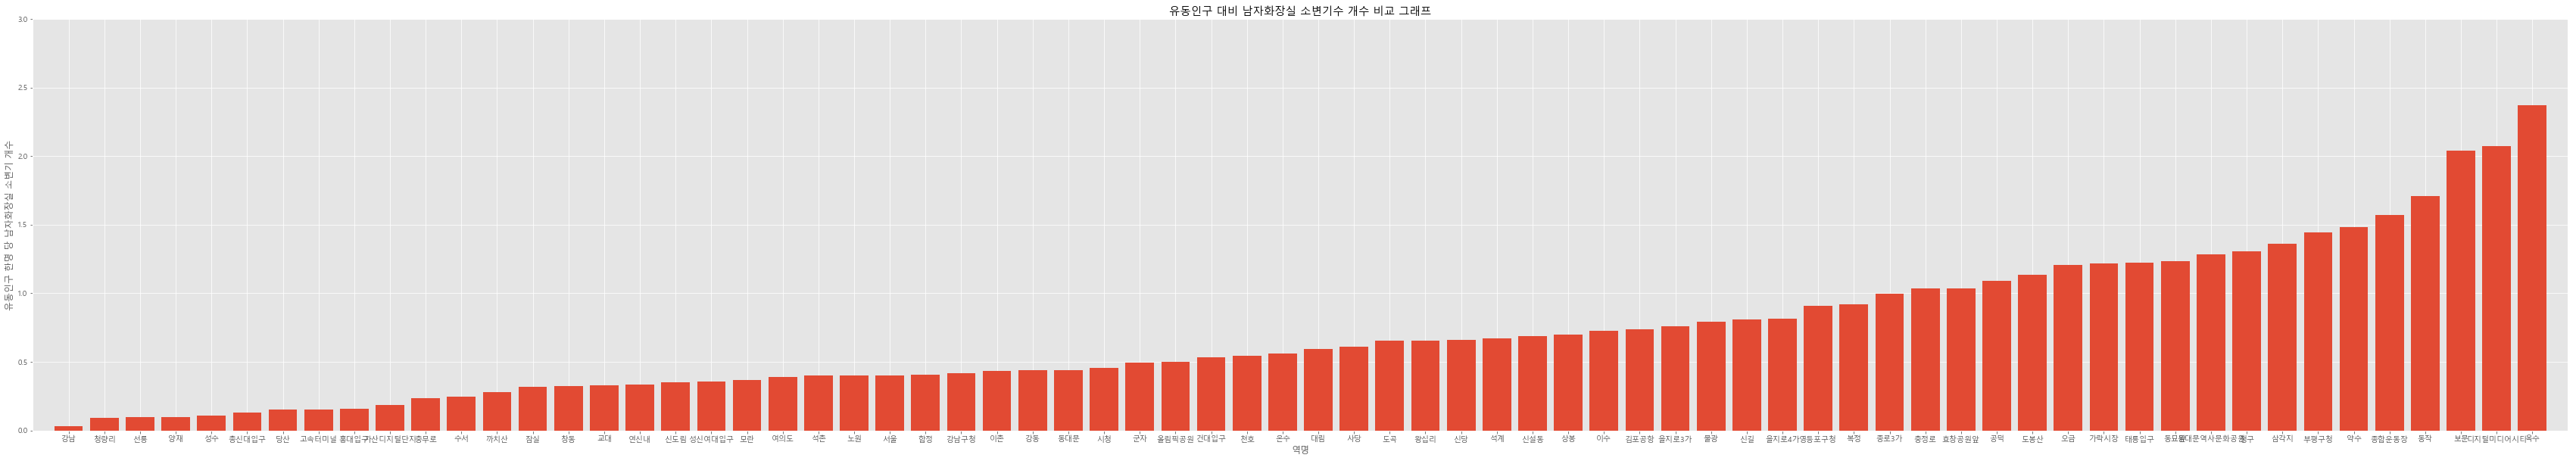

In [16]:
a=[]
b=[]
for i in range(1,71):
    a.append(ratio_man_urinating[i][1])
    b.append(ratio_man_urinating[i][2])
print(a)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (60,10)
plt.rcParams['lines.linewidth'] = 1

y1_value = (b)
x_name=(a)
n_groups = len(x_name)
index = np.arange(n_groups)

plt.bar(index, y1_value, tick_label=x_name, align='center')

plt.xlabel('역명')
plt.ylabel('유동인구 한명 당 남자화장실 소변기 개수')
plt.title('유동인구 대비 남자화장실 소변기수 개수 비교 그래프')
plt.xlim( -1, n_groups)
plt.ylim( 0, 3)
plt.show()

# 유동인구 대비 여자화장실 대변기수 개수 비교 그래프

['양재', '강남', '청량리', '총신대입구', '고속터미널', '홍대입구', '가산디지털단지', '선릉', '서울', '연신내', '강남구청', '성수', '동대문', '당산', '여의도', '까치산', '수서', '불광', '잠실', '강동', '모란', '온수', '이수', '천호', '석촌', '창동', '합정', '신도림', '성신여대입구', '충무로', '도곡', '올림픽공원', '석계', '건대입구', '교대', '노원', '을지로3가', '김포공항', '시청', '충정로', '대림', '상봉', '공덕', '사당', '신길', '약수', '신당', '군자', '효창공원앞', '왕십리', '복정', '디지털미디어시티', '이촌', '옥수', '도봉산', '영등포구청', '청구', '태릉입구', '신설동', '부평구청', '보문', '동묘앞', '종합운동장', '을지로4가', '삼각지', '종로3가', '동작', '동대문역사문화공원', '가락시장', '오금']


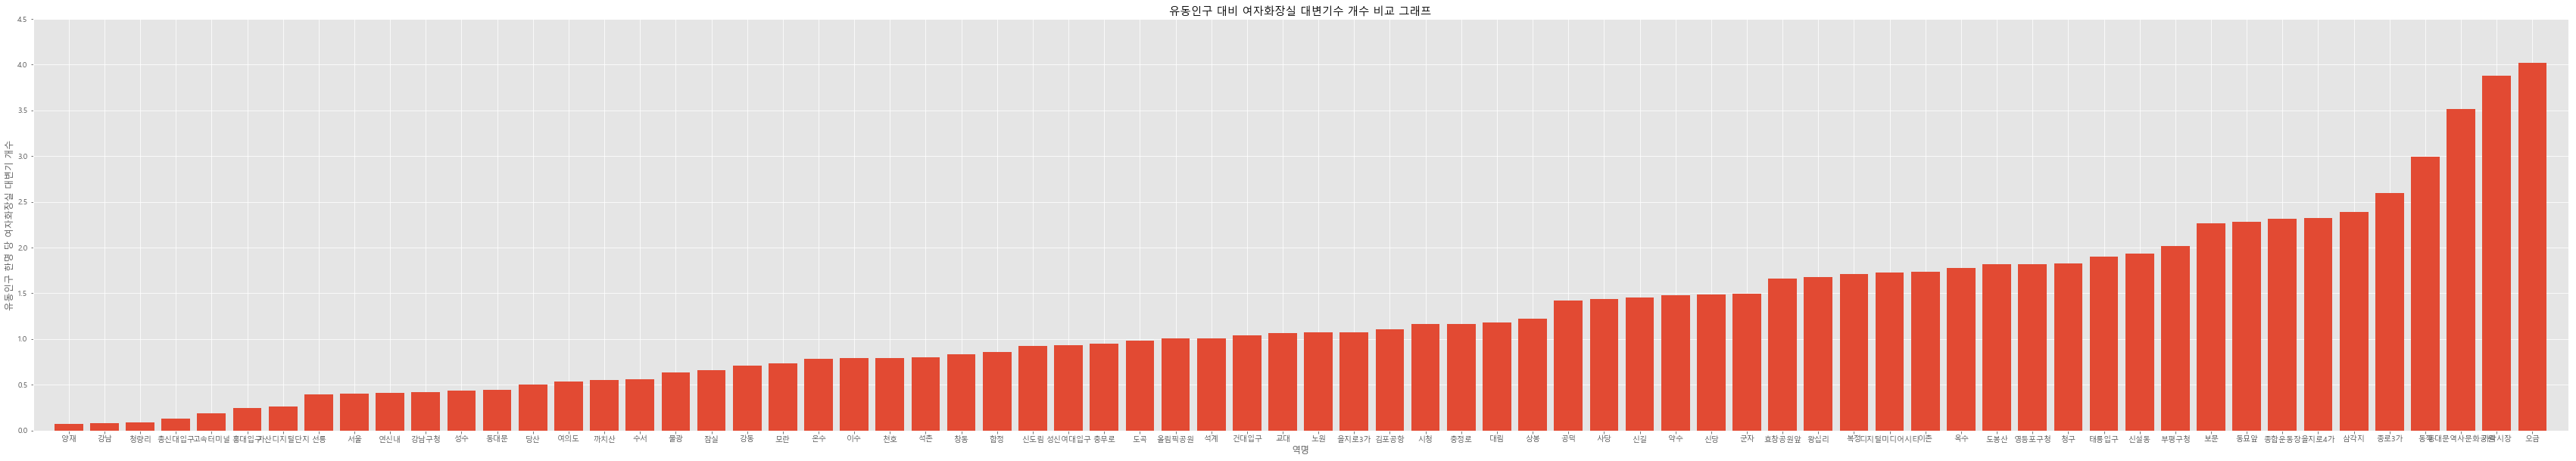

In [17]:
a=[]
b=[]
for i in range(1,71):
    a.append(ratio_woman_toilet[i][1])
    b.append(ratio_woman_toilet[i][2])
print(a)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (60,10)
plt.rcParams['lines.linewidth'] = 1

y1_value = (b)
x_name=(a)
n_groups = len(x_name)
index = np.arange(n_groups)

plt.bar(index, y1_value, tick_label=x_name, align='center')

plt.xlabel('역명')
plt.ylabel('유동인구 한명 당 여자화장실 대변기 개수')
plt.title('유동인구 대비 여자화장실 대변기수 개수 비교 그래프')
plt.xlim( -1, n_groups)
plt.ylim( 0, 4.5)
plt.show()

### (6) 결론
위의 세 가지 그래프에서 보이는 바와 같이 강남, 양재, 청량리와 같은 역의 화장실이 하위권을 차지했고, 오금, 동작, 가락시장 등의 역의 화장실이 상위권을 차지하였다.
위의 그래프를 통해 어떤 역의 화장실이 사람에 비해 변기 수가 적고, 어떤 역의 화장실이 사람에 비해 변기 수가 많은지 상대적으로 파악할 수 있다.

### (7) 참고문헌
matplotlib 사용방법 http://pythonstudy.xyz/python/article/407-Matplotlib-차트-플롯-그리기

matplotlib 사용방법 https://matplotlib.org/gallery/index.html

matplotlib 사용시 한글깨짐 해결 https://programmers.co.kr/learn/courses/21/lessons/950